In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import shap

def preprocess_text(text):
    stopwords = [
        "I",
        "a",
        "about",
        "an",
        "and",
        "are",
        "as",
        "at",
        "be",
        "by",
        "com",
        "for",
        "from",
        "how",
        "in",
        "is",
        "it",
        "of",
        "on",
        "or",
        "that",
        "the",
        "this",
        "to",
        "was",
        "what",
        "when",
        "where",
        "who",
        "will",
        "with",
        "the",
        "www",
    ]

    words = word_tokenize(text.lower())
    text = ' '.join([word for word in words if word.isalpha() and word not in stopwords])
    return text

df = pd.read_excel("Two classes - ChatGPT Study Data.xlsx")
df['text, cleaned'] = df['text, cleaned'].apply(preprocess_text)

# Split data into labels and text
labels = df['Author_type']
texts = df['text, cleaned']

# Convert labels to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)



# Initialize Logistic Regression model
model = LogisticRegression()

# Number of folds for cross-validation
k = 5  # Using 2 folds for this small example

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True)

accuracy_scores = []  # List to store accuracy for each fold

for train_index, test_index in kf.split(texts, labels):
    # Split the data into textx and test sets for this fold
    X_train, X_test = texts[train_index], texts[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Initialize the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the entire dataset
    X_tfidf_train = tfidf_vectorizer.fit_transform(X_train).toarray()
    X_tfidf_test = tfidf_vectorizer.transform(X_test).toarray()


    # Fit the model
    model.fit(X_tfidf_train, y_train)

    # Make predictions
    y_pred = model.predict(X_tfidf_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k
print("Average Accuracy:", average_accuracy)

Average Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    stopwords = [
        "I",
        "a",
        "about",
        "an",
        "and",
        "are",
        "as",
        "at",
        "be",
        "by",
        "com",
        "for",
        "from",
        "how",
        "in",
        "is",
        "it",
        "of",
        "on",
        "or",
        "that",
        "the",
        "this",
        "to",
        "was",
        "what",
        "when",
        "where",
        "who",
        "will",
        "with",
        "the",
        "www",
    ]

    words = word_tokenize(text.lower())
    text = ' '.join([word for word in words if word.isalpha() and word not in stopwords])
    return text

df = pd.read_excel("Two classes - ChatGPT Study Data.xlsx")
df['text, cleaned'] = df['text, cleaned'].apply(preprocess_text)

# Split data into labels and text
labels = df['Author_type']
texts = df['text, cleaned']

# Convert labels to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Initialize the CountVectorizer for Term Frequency
count_vectorizer = CountVectorizer()

# Fit and transform the entire dataset
X_tf = count_vectorizer.fit_transform(texts).toarray()

# Initialize Logistic Regression model
model = LogisticRegression()

# Number of folds for cross-validation

k = 5  # Using 2 folds for this small example

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True)

accuracy_scores = []  # List to store accuracy for each fold

for train_index, test_index in kf.split(X_tf):
    # Split the data into train and test sets for this fold
    X_train, X_test = X_tf[train_index], X_tf[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k
print("Average Accuracy:", average_accuracy)


Average Accuracy: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import shap

def preprocess_text(text):
    stopwords = [
        "I",
        "a",
        "about",
        "an",
        "and",
        "are",
        "as",
        "at",
        "be",
        "by",
        "com",
        "for",
        "from",
        "how",
        "in",
        "is",
        "it",
        "of",
        "on",
        "or",
        "that",
        "the",
        "this",
        "to",
        "was",
        "what",
        "when",
        "where",
        "who",
        "will",
        "with",
        "the",
        "www",
    ]

    words = word_tokenize(text.lower())
    text = ' '.join([word for word in words if word.isalpha() and word not in stopwords])
    return text

df = pd.read_excel("Two classes - ChatGPT Study Data.xlsx")
df['text, cleaned'] = df['text, cleaned'].apply(preprocess_text)

# Split data into labels and text
labels = df['Author_type']
texts = df['text, cleaned']

# Convert labels to numerical values (0 for 'Student')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_test_tfidf)

#y_test = (y_pred > 0.5)  # Convert probabilities to binary values

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          AI       1.00      1.00      1.00        14
     Student       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [ ]:
explainer = shap.LinearExplainer(model, X_train_tfidf, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_tfidf)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
shap.initjs()

ind = 7
shap.plots.force(
    explainer.expected_value, shap_values[ind,:], X_test_tfidf[ind,:],
    feature_names=tfidf_vectorizer.get_feature_names_out()
)

In [ ]:
shap.initjs()

ind = 6
shap.plots.force(
    explainer.expected_value, shap_values[ind,:], X_test_tfidf[ind,:],
    feature_names=tfidf_vectorizer.get_feature_names_out()
)

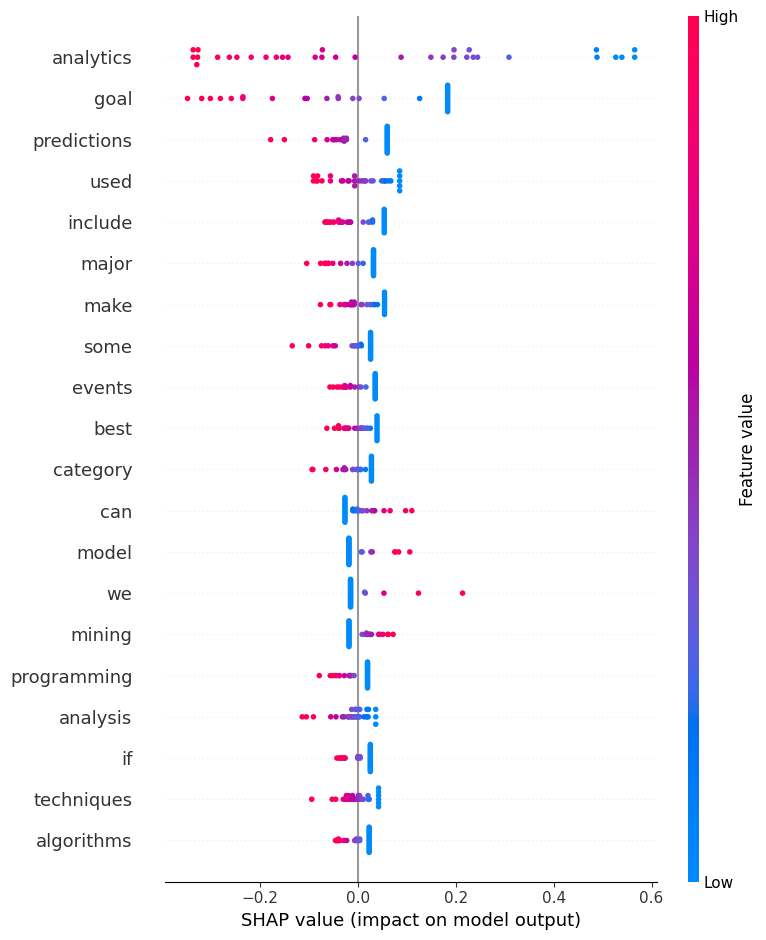

In [ ]:
shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())

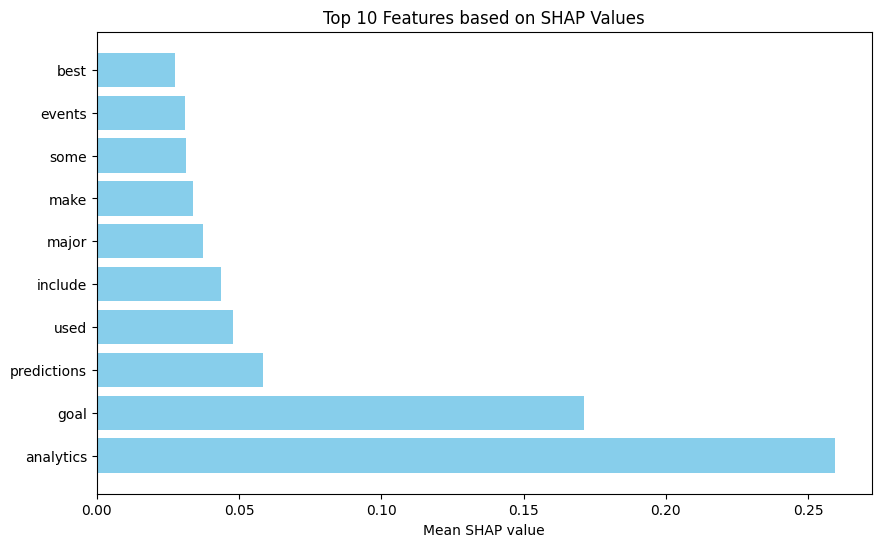

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

shap_values_np = np.array(shap_values)
mean_abs_shap = np.mean(np.abs(shap_values_np), axis=0)
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_indices = np.argsort(mean_abs_shap)[::-1]
top_feature_indices = sorted_indices[:10]
top_feature_values = mean_abs_shap[top_feature_indices]
top_feature_names = [feature_names[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(np.arange(10), top_feature_values, color='skyblue')
plt.yticks(np.arange(10), top_feature_names)
plt.xlabel('Mean SHAP value')
plt.title(f'Top 10 Features based on SHAP Values')
plt.show()


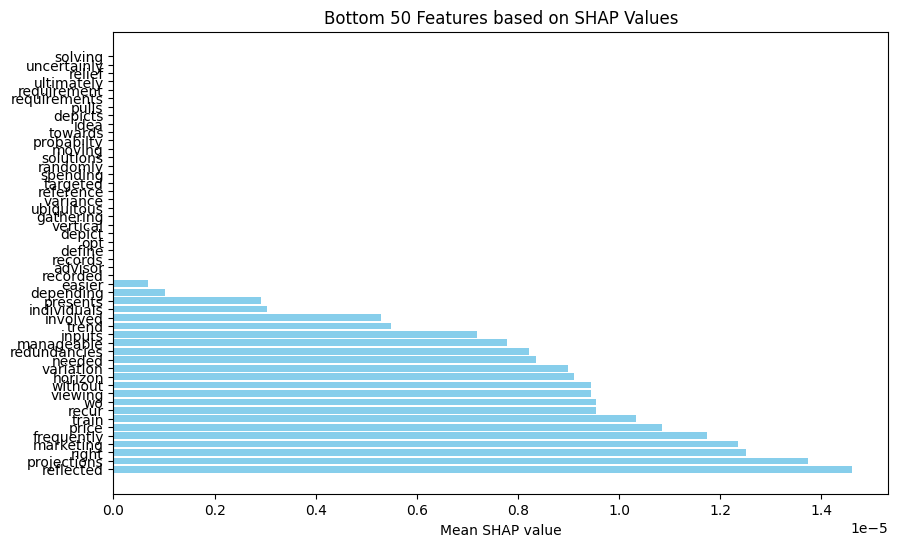

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

shap_values_np = np.array(shap_values)
mean_abs_shap = np.mean(np.abs(shap_values_np), axis=0)
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_indices = np.argsort(mean_abs_shap)[::-1]
bottom_feature_indices = sorted_indices[-50:]
bottom_feature_values = mean_abs_shap[bottom_feature_indices]
bottom_feature_names = [feature_names[i] for i in bottom_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(np.arange(50), bottom_feature_values, color='skyblue')
plt.yticks(np.arange(50), bottom_feature_names)
plt.xlabel('Mean SHAP value')
plt.title(f'Bottom 50 Features based on SHAP Values')
plt.show()

In [ ]:
print(top_feature_names)

['analytics', 'goal', 'predictions', 'used', 'include', 'major', 'make', 'some', 'events', 'best']


In [ ]:
print(bottom_feature_names)

['reflected', 'projections', 'right', 'marketing', 'frequently', 'price', 'train', 'recur', 'wo', 'viewing', 'without', 'horizon', 'variation', 'needed', 'redundancies', 'manageable', 'inputs', 'trend', 'involved', 'individuals', 'presents', 'depending', 'easier', 'recorded', 'advisor', 'records', 'define', 'opt', 'depict', 'vertical', 'gathering', 'ubiquitous', 'variance', 'reference', 'targeted', 'spending', 'randomly', 'solutions', 'moving', 'probabilty', 'towards', 'idea', 'depicts', 'pulls', 'requirements', 'requirement', 'ultimately', 'relief', 'uncertainly', 'solving']
